In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [3]:
#import regular season data
nhl_data = pd.read_excel("NHL 2010-2020 Data.xlsx")
advanced = pd.read_csv("Advanced_Analytics_2010-2020.csv", header=1)

#replace -- to value 0
nhl_data = nhl_data.replace(to_replace='--', value=0)

#account for relocation of Phoenix Coyotes
nhl_data = nhl_data.replace(to_replace="Phoenix Coyotes", value="Arizona Coyotes")

In [4]:
# Changing dates in the advanced dataframe to match that of the nhl_data dataframe

for i in range(0,len(advanced["Season"])-1):
    if advanced["Season"][i] == "Nov-10":
        advanced["Season"][i] = np.int64(20102011)

for i in range(0,len(advanced["Season"])-1):
    if advanced["Season"][i] == "Dec-11" or advanced["Season"][i] == "2011-12":
        advanced["Season"][i] = np.int64(20112012)
        
for i in range(0,len(advanced["Season"])):
    if advanced["Season"][i] == "2012-13":
        advanced["Season"][i] = np.int64(20122013)
        
for i in range(0,len(advanced["Season"])-1):
    if advanced["Season"][i] == "2013-14":
        advanced["Season"][i] = np.int64(20132014)

for i in range(0,len(advanced["Season"])-1):
    if advanced["Season"][i] == "2013-14":
        advanced["Season"][i] = np.int64(20132014)
        
for i in range(0,len(advanced["Season"])-1):
    if advanced["Season"][i] == "2014-15":
        advanced["Season"][i] = np.int64(20142015)

for i in range(0,len(advanced["Season"])-1):
    if advanced["Season"][i] == "2015-16":
        advanced["Season"][i] = np.int64(20152016)
    
for i in range(0,len(advanced["Season"])-1):
    if advanced["Season"][i] == "2016-17":
        advanced["Season"][i] = np.int64(20162017)

for i in range(0,len(advanced["Season"])-1):
    if advanced["Season"][i] == "2017-18":
        advanced["Season"][i] = np.int64(20172018)

for i in range(0,len(advanced["Season"])-1):
    if advanced["Season"][i] == "2018-19":
        advanced["Season"][i] = np.int64(20182019)
        
for i in range(0,len(advanced["Season"])-1):
    if advanced["Season"][i] == "2019-20":
        advanced["Season"][i] = np.int64(20192020)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipyker

In [5]:
# Changing the short form of the team names to their full form, to keep the names uniform between the two datasets
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "MTL":
        advanced["Tm"][i] = "Montréal Canadiens"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "TOR":
        advanced["Tm"][i] = "Toronto Maple Leafs"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "VEG":
        advanced["Tm"][i] = "Vegas Golden Knights"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "CAR":
        advanced["Tm"][i] = "Carolina Hurricanes"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "CGY":
        advanced["Tm"][i] = "Calgary Flames"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "NSH":
        advanced["Tm"][i] = "Nashville Predators"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "SJS":
        advanced["Tm"][i] = "San Jose Sharks"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "LAK":
        advanced["Tm"][i] = "Los Angeles Kings"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "CHI":
        advanced["Tm"][i] = "Chicago Blackhawks"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "COL":
        advanced["Tm"][i] = "Colorado Avalanche"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "TBL":
        advanced["Tm"][i] = "Tampa Bay Lightning"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "PIT":
        advanced["Tm"][i] = "Pittsburgh Penguins"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "BOS":
        advanced["Tm"][i] = "Boston Bruins"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "WSH":
        advanced["Tm"][i] = "Washington Capitals"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "WPG":
        advanced["Tm"][i] = "Winnipeg Jets"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "ATL":
        advanced["Tm"][i] = "Atlanta Thrashers"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "MTL":
        advanced["Tm"][i] = "Montréal Canadiens"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "PHX" or advanced["Tm"][i] == "ARI":
        advanced["Tm"][i] = "Arizona Coyotes"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "MIN":
        advanced["Tm"][i] = "Minnesota Wild"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "CBJ":
        advanced["Tm"][i] = "Columbus Blue Jackets"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "FLA":
        advanced["Tm"][i] = "Florida Panthers"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "OTT":
        advanced["Tm"][i] = "Ottawa Senators"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "STL":
        advanced["Tm"][i] = "St. Louis Blues"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "DAL":
        advanced["Tm"][i] = "Dallas Stars"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "PHI":
        advanced["Tm"][i] = "Philadelphia Flyers"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "ANA":
        advanced["Tm"][i] = "Anaheim Ducks"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "VAN":
        advanced["Tm"][i] = "Vancouver Canucks"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "BUF":
        advanced["Tm"][i] = "Buffalo Sabres"
        
for i in range (0, len(advanced["Tm"])):
    if advanced["Tm"][i] == "EDM":
        advanced["Tm"][i] = "Edmonton Oilers"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "NYI":
        advanced["Tm"][i] = "New York Islanders"

for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "NYR":
        advanced["Tm"][i] = "New York Rangers"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "DET":
        advanced["Tm"][i] = "Detroit Red Wings"
        
for i in range (0, len(advanced["Tm"])-1):
    if advanced["Tm"][i] == "NJD":
        advanced["Tm"][i] = "New Jersey Devils"

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-p

In [6]:
#open new columns for advanced statistics
nhl_data["CF"] = 0.
nhl_data["CA"] = 0.
nhl_data["CF%"] = 0.
nhl_data["FF"] = 0.
nhl_data["FA"] = 0.
nhl_data["FF%"] = 0.
nhl_data["oiSH%"] = 0.
nhl_data["oiSV%"] = 0.
nhl_data["PDO"] = 0.
nhl_data["oZS%"] = 0.
nhl_data["dZS%"] = 0.
nhl_data["FOW"] = 0.
nhl_data["FOL"] = 0.
nhl_data["FO%"] = 0.
nhl_data["HIT"] = 0.
nhl_data["BLK"] = 0.

# inserting advanced statistics into original dataframe
for i in range(0,len(nhl_data["Team"])):
    for j in range (0,len(advanced["Tm"])):
        if nhl_data["Season"][i] == advanced["Season"][j] and nhl_data["Team"][i] == advanced["Tm"][j]:
            nhl_data["CF"][i] = advanced["CF"][j]
            nhl_data["CA"][i] = advanced["CA"][j]
            nhl_data["CF%"][i] = advanced["CF%"][j]
            nhl_data["FF"][i] = advanced["FF"][j]
            nhl_data["FA"][i] = advanced["FA"][j]
            nhl_data["FF%"][i] = advanced["FF%"][j]
            nhl_data["oiSH%"][i] = advanced["oiSH%"][j]
            nhl_data["oiSV%"][i] = advanced["oiSV%"][j]
            nhl_data["PDO"][i] = advanced["PDO"][j]
            nhl_data["oZS%"][i] = advanced["oZS%"][j]
            nhl_data["dZS%"][i] = advanced["dZS%"][j]
            nhl_data["FOW"][i] = advanced["FOW"][j]
            nhl_data["FOL"][i] = advanced["FOL"][j]
            nhl_data["FO%"][i] = advanced["FO%"][j]
            nhl_data["HIT"][i] = advanced["HIT"][j]
            nhl_data["BLK"][i] = advanced["BLK"][j]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A valu

In [7]:
# Read in PLayoff Data
playoff_data = pd.read_excel("playoff_data_full.xlsx")
playoff_data["Class"] = 0

for i in range(0,len(playoff_data["W"])):
    if playoff_data["W"][i] == 16:
        playoff_data["Class"][i] = 5  #indicates stanley cup champion
    if playoff_data["W"][i] > 11 and playoff_data["W"][i] < 16:
        playoff_data["Class"][i] = 4  #indicates stanley cup finalist
        
    if playoff_data["W"][i] > 7 and playoff_data["W"][i] < 12:
        playoff_data["Class"][i] = 3  #indicates Conference Finalist
        
    if playoff_data["W"][i] > 3 and playoff_data["W"][i] < 8:
        playoff_data["Class"][i] = 2  #Second round team
        
    if playoff_data["W"][i] < 4:
        playoff_data["Class"][i] = 1  #indicates stanley cup finalist

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-p

In [8]:
#add new class column to nhl_data
#set each index to 0 (indicating the team missed the playoffs)
nhl_data["Class"] = 0

#loop through nhl_data and playoff data to correctly match and append the correct classification to each team, based on their 
#name and the year of the season the statistics are from
for i in range(0, len(nhl_data["Team"])):
    for j in range(0, len(playoff_data["Season"])):
                if nhl_data["Season"][i] == playoff_data["Season"][j] and nhl_data["Team"][i] == playoff_data["Team"][j]:
                    nhl_data["Class"][i] = playoff_data["Class"][j]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
#create a features Dataframe and labels dataframe
features = nhl_data.drop(["Team", "Season", "Class"], axis = 1)
labels = nhl_data["Class"]

(array([138.,   0.,  81.,   0.,  43.,   0.,  20.,   0.,  12.,   9.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

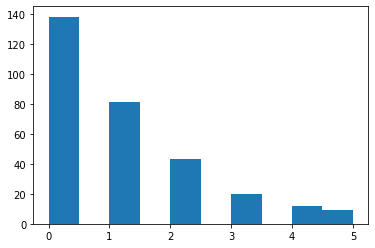

In [16]:
plt.hist(labels)

In [10]:
train_vectors, test_vectors, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state=1234)

In [17]:
len(features.columns)

37

In [18]:
accuracy = []
for i in range(1, len(features.columns) + 1):
    pca = PCA(n_components=i, whiten=True)
    pca_fit = pca.fit(train_vectors)

    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    
    model = SVC(C=10, gamma = 1e-06, kernel="linear")
    fit = model.fit(pca_train_vectors, train_labels)

    predict_vectors = pca_test_vectors
    true_labels = test_labels

    pred_labels = fit.predict(predict_vectors)

    accuracy.append([fit.score(predict_vectors, true_labels), i])

In [25]:
accuracy = np.array(accuracy)

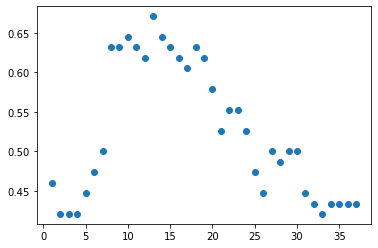

In [31]:
plt.scatter(accuracy.T[1],accuracy.T[0])

In [29]:
model = SVC(C=10, gamma = 1e-06, kernel="linear")
fit = model.fit(pca_train_vectors, train_labels)

predict_vectors = pca_test_vectors
true_labels = test_labels

pred_labels = fit.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(5)))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.22      0.22      0.22        18
           2       0.00      0.00      0.00        12
           3       0.17      0.33      0.22         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3

    accuracy                           0.43        76
   macro avg       0.19      0.23      0.20        76
weighted avg       0.40      0.43      0.41        76

[[28  4  0  0  2]
 [ 8  4  2  1  1]
 [ 2  3  0  2  3]
 [ 0  1  1  1  0]
 [ 0  5  0  0  0]]


In [30]:
model = SVC(C=0.01, kernel="linear")
fit = model.fit(train_vectors, train_labels)

predict_vectors = test_vectors
true_labels = test_labels

pred_labels = fit.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(30)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        35
           1       0.42      0.61      0.50        18
           2       0.40      0.33      0.36        12
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3

    accuracy                           0.63        76
   macro avg       0.29      0.31      0.30        76
weighted avg       0.57      0.63      0.60        76

[[33  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 2 11  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 2  4  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
